In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from pathlib import Path


In [6]:
data_path = Path("../loan_approval_dataset.csv")
print("dataset exists:", data_path.exists())

dataset exists: True


In [7]:
df = pd.read_csv(data_path)

In [8]:
df.shape

(4269, 13)

In [9]:
df.columns.tolist()

['loan_id',
 ' no_of_dependents',
 ' education',
 ' self_employed',
 ' income_annum',
 ' loan_amount',
 ' loan_term',
 ' cibil_score',
 ' residential_assets_value',
 ' commercial_assets_value',
 ' luxury_assets_value',
 ' bank_asset_value',
 ' loan_status']

In [10]:
df.columns = df.columns.str.strip()

In [11]:
df.columns.tolist()

['loan_id',
 'no_of_dependents',
 'education',
 'self_employed',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value',
 'loan_status']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [13]:
df.describe(include="all")

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269,4269,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Graduate,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved
freq,NaN,NaN,2144,2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2656
mean,2135.000000,2.498712,NaN,NaN,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,NaN
std,1232.498479,1.695910,NaN,NaN,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,NaN
min,1.000000,0.000000,NaN,NaN,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,NaN
25%,1068.000000,1.000000,NaN,NaN,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,NaN
50%,2135.000000,3.000000,NaN,NaN,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,NaN
75%,3202.000000,4.000000,NaN,NaN,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,NaN


In [14]:
target_col = "loan_status"

In [15]:
df[target_col].unique()

array([' Approved', ' Rejected'], dtype=object)

In [16]:
df[target_col] = df[target_col].astype(str).str.strip().str.lower()

In [17]:
df[target_col].unique()

array(['approved', 'rejected'], dtype=object)

In [18]:
df[target_col].value_counts(dropna=False)

loan_status
approved    2656
rejected    1613
Name: count, dtype: int64

<Axes: xlabel='loan_status', ylabel='count'>

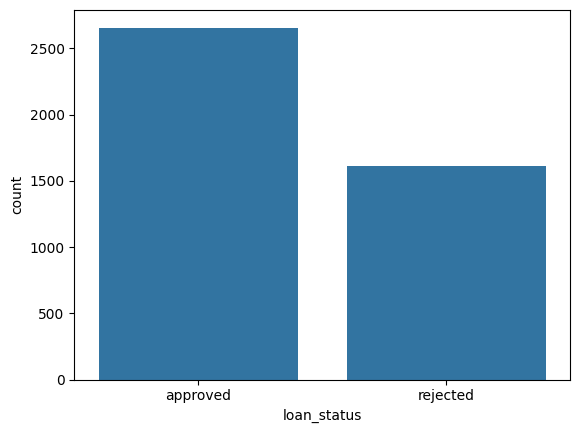

In [19]:
sns.countplot(x=target_col, data=df)

In [20]:
df.drop(columns=["loan_id"], inplace=True)

In [21]:
df.columns.to_list()

['no_of_dependents',
 'education',
 'self_employed',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value',
 'loan_status']

In [22]:
df2 = df.dropna(subset=[target_col]).copy()

In [23]:
X = df2.drop(columns=[target_col])
y = df2[target_col]

In [24]:
X.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000


## Feature Types

In [25]:
cat_cols = X.select_dtypes(include=["object", "category"]).columns.to_list()

In [26]:
num_cols = X.select_dtypes(include=[np.number]).columns.to_list()

In [27]:
cat_cols

['education', 'self_employed']

In [28]:
num_cols

['no_of_dependents',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value']

## Feature Processing Pipeline

In [29]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [30]:

from sklearn.ensemble import RandomForestClassifier

In [31]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
])

In [32]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [33]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, cat_cols),
    ('num', numerical_transformer, num_cols)
], remainder='drop')

In [34]:
preprocessor

,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None


## Stage 1 Classification Baseline

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [36]:
y = df2[target_col].astype(str).str.strip().str.lower()

In [37]:
y = y.map({'approved': 1, 'rejected': 0})

In [38]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [40]:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training set class distribution:\n", y_train.value_counts())
print("Test set class distribution:\n", y_test.value_counts())

Training set shape: (3415, 11)
Test set shape: (854, 11)
Training set class distribution:
 loan_status
1    2125
0    1290
Name: count, dtype: int64
Test set class distribution:
 loan_status
1    531
0    323
Name: count, dtype: int64


## Fit RF baseline Pipeline

In [41]:
rf_clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid = {'classifier__n_estimators': [100, 200, 300, 400],
              'classifier__max_depth': [None, 4, 8, 10],
              'classifier__min_samples_split': [2, 5, 10],
              'classifier__min_samples_leaf': [1, 2, 4],
              'classifier__max_features': ['sqrt', 'log2', None]}

In [44]:
grid = GridSearchCV(estimator=rf_clf_pipeline, param_grid=param_grid, scoring = 'f1', cv=5, n_jobs=-1, verbose=2)

In [45]:
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)
print("Best F1 score:", grid.best_score_)
best_rf_clf = grid.best_estimator_
y_pred_best = best_rf_clf.predict(X_test)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters: {'classifier__max_depth': None, 'classifier__max_features': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 400}
Best F1 score: 0.9861809017664089


In [46]:
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       323
           1       0.99      1.00      0.99       531

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854



In [47]:
rf_clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=400, max_depth=None, min_samples_split=5, min_samples_leaf=1, max_features=None, oob_score=True))
])

In [48]:
rf_clf_pipeline.fit(X_train, y_train)
y_pred_clf = rf_clf_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_clf))
print("OOB Score:", rf_clf_pipeline.named_steps['classifier'].oob_score_)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       323
           1       0.99      1.00      0.99       531

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854

OOB Score: 0.9838945827232797


## Feature importance analysis

In [49]:
feature_importances = rf_clf_pipeline.named_steps['classifier'].feature_importances_
preprocessor = rf_clf_pipeline.named_steps['preprocessor']
feature_names = preprocessor.get_feature_names_out()

In [50]:
importance_df = pd.DataFrame(
    {
        'Feature': feature_names,
        'Importance': feature_importances
    }
)
importance_df = importance_df.sort_values(by = 'Importance', ascending=False)
print("top 10 important features: \n", importance_df)


top 10 important features: 
                           Feature  Importance
8                num__cibil_score    0.823585
7                  num__loan_term    0.085274
6                num__loan_amount    0.036292
5               num__income_annum    0.026328
11       num__luxury_assets_value    0.008609
9   num__residential_assets_value    0.006280
10   num__commercial_assets_value    0.006237
4           num__no_of_dependents    0.003311
12          num__bank_asset_value    0.003030
3         cat__self_employed_ Yes    0.000374
2          cat__self_employed_ No    0.000259
0        cat__education_ Graduate    0.000221
1    cat__education_ Not Graduate    0.000199


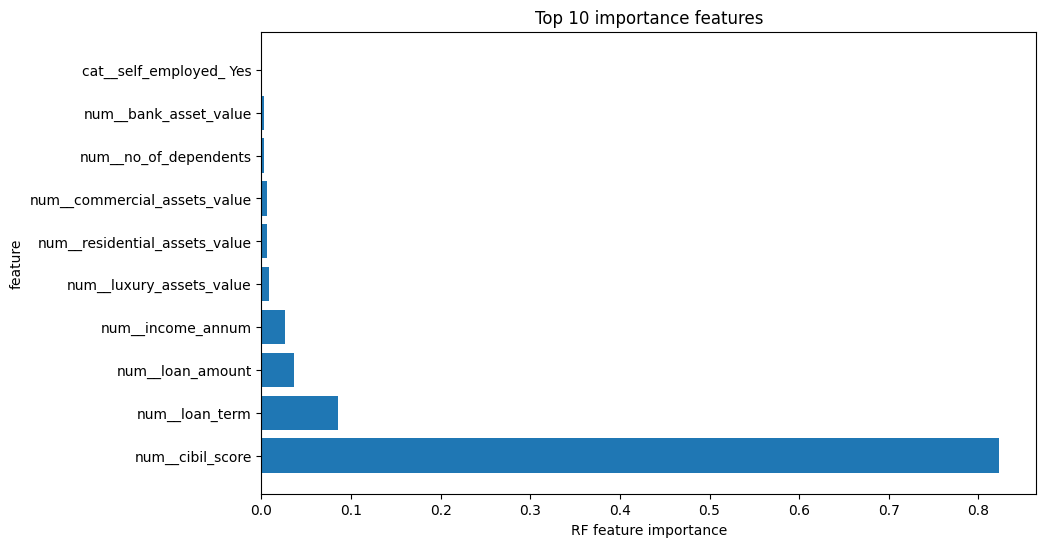

In [51]:
plt.figure(figsize = (10,6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
plt.xlabel("RF feature importance")
plt.ylabel("feature")
plt.title("Top 10 importance features")
plt.show()

## Stage 2: Regression

In [52]:
df["loan_status"].unique()

array(['approved', 'rejected'], dtype=object)

In [53]:
df3 = df[df["loan_status"]=="approved"].copy()

In [54]:
df3["loan_status"].unique()

array(['approved'], dtype=object)

In [55]:
df3.shape

(2656, 12)

In [56]:
df3.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,approved
6,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,approved
8,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,approved
10,4,Graduate,Yes,2900000,11200000,2,547,8100000,4700000,9500000,3100000,approved
13,2,Graduate,Yes,9100000,31500000,14,679,10800000,16600000,20900000,5000000,approved


In [57]:
regression_target = "loan_amount"
reg_df = df3.dropna(subset=[regression_target]).copy()

In [58]:
X_reg = reg_df.drop(columns=[regression_target, "loan_status"])
y_reg = reg_df[regression_target]

In [59]:
cat_cols_reg = X_reg.select_dtypes(include=["object", "category"]).columns.to_list()
num_cols_reg = X_reg.select_dtypes(include=[np.number]).columns.to_list()

In [60]:
print("Categorical columns:", cat_cols_reg)
print("Numerical columns:", num_cols_reg)

Categorical columns: ['education', 'self_employed']
Numerical columns: ['no_of_dependents', 'income_annum', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [62]:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (2124, 10)
Test set shape: (532, 10)


In [63]:
reg_preprocess = ColumnTransformer(transformers=[
    ('num', numerical_transformer, num_cols_reg),
    ('cat', categorical_transformer, cat_cols_reg)
], remainder='drop')

## Regression model fit

In [64]:
from sklearn.ensemble import RandomForestRegressor
rf_reg_pipeline = Pipeline(steps=[
    ('preprocessor', reg_preprocess),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [65]:
params_reg_grid = {
    'regressor__n_estimators': [100, 200, 300, 400],
    'regressor__max_depth': [None, 4, 8, 10],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['sqrt', 'log2', None]
}

In [66]:
grid = GridSearchCV(estimator=rf_reg_pipeline, param_grid=params_reg_grid, scoring='r2', cv=5, n_jobs=-1, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'regressor__max_depth': [None, 4, ...], 'regressor__max_features': ['sqrt', 'log2', ...], 'regressor__min_samples_leaf': [1, 2, ...], 'regressor__min_samples_split': [2, 5, ...], ...}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [67]:
print("Best params(regression):", grid.best_params_)
best_reg = grid.best_estimator_

Best params(regression): {'regressor__max_depth': 4, 'regressor__max_features': None, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 400}


In [68]:
grid.best_score_

np.float64(0.8669960610203855)

## Regression model evaluation

In [69]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [70]:
rf_reg_pipeline = Pipeline(steps=[
    ('preprocessor', reg_preprocess),
    ('regressor', RandomForestRegressor(max_depth=4,
                                        max_features=None,
                                        min_samples_leaf=4,
                                        min_samples_split=2,
                                        n_estimators=400))
])
rf_reg_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [71]:
reg_pred = rf_reg_pipeline.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, reg_pred))
print("Mean Squared Error:", mean_squared_error(y_test, reg_pred))
print("R^2 Score:", r2_score(y_test, reg_pred))

Mean Absolute Error: 2479618.321194651
Mean Squared Error: 10854492927559.695
R^2 Score: 0.8737139915406461


In [72]:
feature_importances = rf_reg_pipeline.named_steps['regressor'].feature_importances_
preprocessor = rf_reg_pipeline.named_steps['preprocessor']
feature_names = preprocessor.get_feature_names_out()
importance_df = pd.DataFrame(
    {
        'Feature': feature_names,
        'Importance': feature_importances
    }
)
importance_df = importance_df.sort_values(by = 'Importance', ascending=False)
print("top 10 important features: \n", importance_df)


top 10 important features: 
                           Feature  Importance
1               num__income_annum    0.990735
3                num__cibil_score    0.002572
5    num__commercial_assets_value    0.002050
2                  num__loan_term    0.001437
6        num__luxury_assets_value    0.001331
4   num__residential_assets_value    0.000947
7           num__bank_asset_value    0.000780
0           num__no_of_dependents    0.000120
11        cat__self_employed_ Yes    0.000014
8        cat__education_ Graduate    0.000010
9    cat__education_ Not Graduate    0.000004
10         cat__self_employed_ No    0.000000


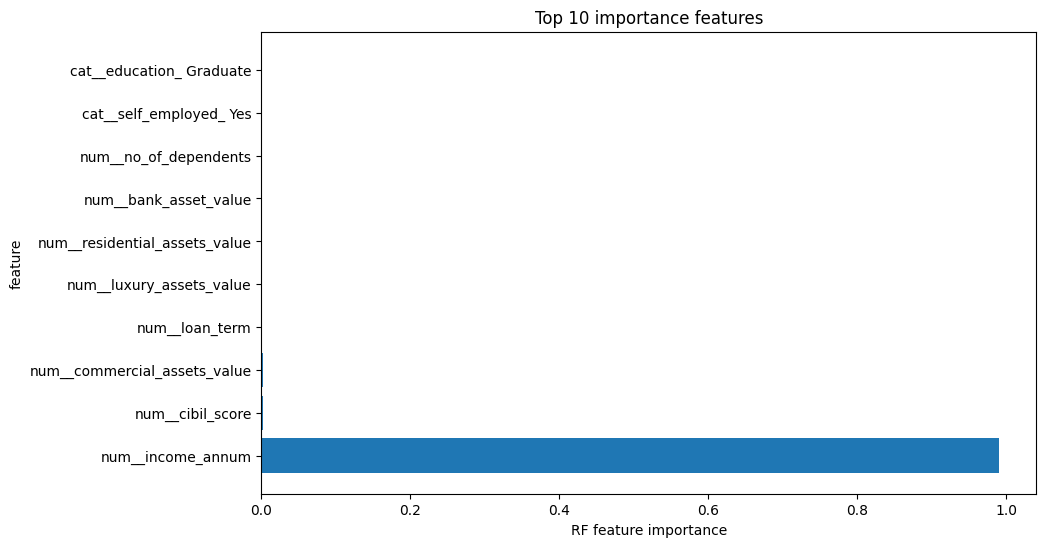

In [73]:
plt.figure(figsize = (10,6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
plt.xlabel("RF feature importance")
plt.ylabel("feature")
plt.title("Top 10 importance features")
plt.show()

## Saving Models

In [74]:
import joblib
import pandas as  pd
joblib.dump(rf_clf_pipeline, "../models/stage_1_rf_classifier_pipeline.pkl")
joblib.dump(rf_reg_pipeline, "../models/stage_2_rf_regressor_pipeline.pkl")
    

['../models/stage_2_rf_regressor_pipeline.pkl']

## Predition Function

In [75]:
import joblib
import pandas as  pd

In [76]:
clf = joblib.load("../models/stage_1_rf_classifier_pipeline.pkl")
reg = joblib.load("../models/stage_2_rf_regressor_pipeline.pkl")

In [77]:
def two_stage_prediction(input_data):
    """
    input_data: dict with keys as feature names and values as feature values
    returns: dict with keys 'loan_status', 'predicted_loan_amount', decision probability
    """
    input_df = pd.DataFrame([input_data])
    loan_status_pred = clf.predict(input_df)[0]
    decision_probability = clf.predict_proba(input_df)
    
    if loan_status_pred == 1:
        # stage 2 prediction only if loan is approved
        predicted_loan_amount = reg.predict(input_df)[0]
    else:
        predicted_loan_amount = 0
    
    return {
        "loan_status": loan_status_pred,
        "predicted_loan_amount": predicted_loan_amount,
        "probability": float(decision_probability[0,1])
    }

In [78]:
X_test.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'],
      dtype='object')

In [79]:
clf.feature_names_in_

array(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'], dtype=object)

In [80]:
reg.feature_names_in_

array(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value',
       'bank_asset_value'], dtype=object)

In [81]:
two_stage_prediction(df.iloc[0].to_dict())

{'loan_status': np.int64(1),
 'predicted_loan_amount': np.float64(30045662.850513905),
 'probability': 1.0}

In [82]:
#example dicttionary for prediction
input_example = {
    'no_of_dependents': 0,
    'education': 'Graduate',
    'self_employed': 'No',
    'income_annum': 50000,
    'loan_term': 360,
    'cibil_score': 550,
    'residential_assets_value': 100000,
    'commercial_assets_value': 50000,
    'luxury_assets_value': 25000,
    'bank_asset_value': 15000,
    'loan_amount': 200000
}


In [83]:
two_stage_prediction(input_example)

{'loan_status': np.int64(1),
 'predicted_loan_amount': np.float64(1345773.2320224438),
 'probability': 0.5980178571428574}